# COMP2501 Assignment 1
## Sibo Ding
## Spring 2023

### Environmental setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. (1 points) Define a matrix `mat` of your own choice, print the entries of both row 2 and columns 2 to 4 simultaneously.

In [2]:
import numpy as np

mat = np.arange(16).reshape(4, 4)
mat[1, 1:4]

array([5, 6, 7])

### 2. (2 points) Write a function `compute_s_n` that for any given n, computes the $S_n = n*\sqrt{(n+9)}*log_{10}(n)$. Print the $S_n$ with $n = 500$.

In [3]:
import math

def compute_s_n(n):
    return n * math.sqrt(n+9) * math.log10(n)

n = 500
s_n = compute_s_n(n)
s_n

30445.769385546555

### 3. (2 points) Compute the murder rate per 100,000 people for each state and store it in an object called murder_rate. Then use logical operators to find which state has a murder rate per 100,000 people higher than 5. Find these states, print their names and murder rate per 100,000 people.

In [4]:
murders = pd.read_csv('murders.csv')

murder_rate = murders['total'] / murders['population'] * 100000
murder_state_5 = murders[murder_rate > 5]['state']
murder_state_5

8     District of Columbia
18               Louisiana
20                Maryland
25                Missouri
Name: state, dtype: object

In [5]:
murder_rate_5 = murder_rate[murder_rate > 5]
murder_rate_5

8     16.452753
18     7.742581
20     5.074866
25     5.359892
dtype: float64

### 4. (2 points) For all states having a murder rate per 100,000 people higher than 5, use the barplot function to create a barplot with the x-axis being the state name, and the y-axis being the murder rate per 100,000 people of each state.

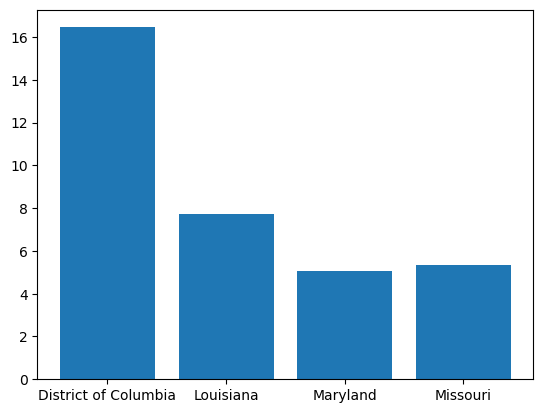

In [6]:
plt.bar(murder_state_5, murder_rate_5)
plt.show()

### 5. (1 points)  Examine the built-in dataset `Orange`. Which of the following is true?
- a.	Orange is tidy data: it has one observation for each row.
- b.	Orange is not tidy: we need at least one column with a character vector.
- c.	Orange is not tidy: it is a matrix instead of a data frame.
- d.	Orange is tidy data: all small datasets are tidy by definition.

Your answer is: [a]

### 6. (3 points) Base on the `murders` dataset, create a table called `my_states` that contains rows for states satisfying two conditions: 1) it is in either West or South, and 2) the murder rate per 100,000 people is less than 2.0. Use `select` to show only the state name, the region and the murder rate, and use top_n function to find the 3 safest states among them.

In [7]:
murders['murder_rate'] = murder_rate # Add murder_rate to dataframe

my_states = murders[((murders['region'] == 'West') | (murders['region'] == 'South'))
                    & (murders['murder_rate'] < 2)]
my_states[['state', 'region', 'murder_rate']]

,state,region,murder_rate
5,Colorado,West,1.292453
11,Hawaii,West,0.514592
12,Idaho,West,0.765510
26,Montana,West,1.212838
37,Oregon,West,0.939684
44,Utah,West,0.795981
47,Washington,West,1.382994
48,West Virginia,South,1.457101
50,Wyoming,West,0.887113


In [8]:
my_states.sort_values(by='murder_rate').head(3) # 3 safest states among them

,state,abb,region,population,total,murder_rate
11,Hawaii,HI,West,1360301,7,0.514592
12,Idaho,ID,West,1567582,12,0.765510
44,Utah,UT,West,2763885,22,0.795981


### 7. (2 points) By using the murders dataset, compute the average murder rate per 100,000 people in the four regions respectively of the U.S., and sort the results by murder rate in ascending order.

In [9]:
# Note: rates cannot be averaged
region_sum = murders.groupby('region').sum(numeric_only=True)
average_murder_rate = region_sum['total'] / region_sum['population'] * 100000
average_murder_rate.sort_values()

region
Northeast        2.655592
West             2.656175
North Central    2.731334
South            3.626558
dtype: float64

### 8. (3 points) Use the ggplot2 package to create a scatterplot from the murders dataset, where the x-axis is the number of population, the y-axis is the total number of murders, and each point in the scatterplot is labeled with the state name. Please add an appropriate title, and axis labels to the plot.

Text(0.5, 1.0, 'US Gun Murders in 2010')

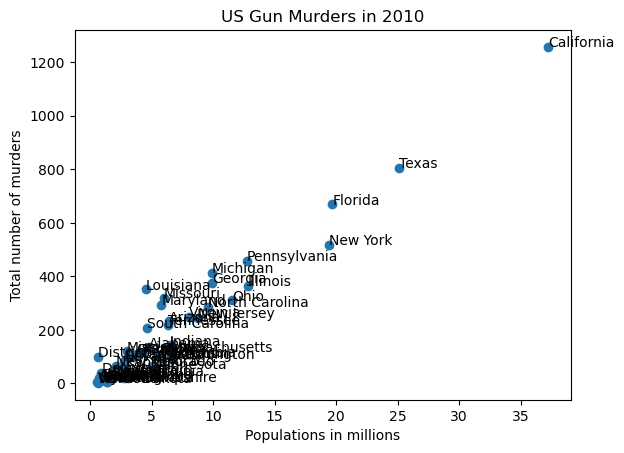

In [10]:
plt.scatter(x=murders['population']/10**6, y=murders['total']) # Points layer
for i in range(len(murders)): # Labels layer
    plt.text(x=murders['population'][i]/10**6, y=murders['total'][i], s=murders['state'][i])
plt.xlabel('Populations in millions') # x-axis label layer
plt.ylabel('Total number of murders') # y-axis label layer
plt.title('US Gun Murders in 2010') # Title layer

### 9. (17 points)  Explore the tidyverse with the COVID-19 dataset (http://www.bio8.cs.hku.hk/comp2501/covid.csv), and answer the following questions.

#### a. (2 points) Read the CSV formatted dataset. Find out how many observations (rows) and variables (columns) are in the dataset. Print the names of all variables.

In [11]:
covid = pd.read_csv('covid.csv')

len(covid) # number of observations
# covid.shape[0]

47480

In [12]:
len(covid.columns) # number of variables
# covid.shape[1]

12

In [13]:
covid.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

#### b. (1 points) List the observation with the largest `Cumulative_number_for_14_days_of_COVID.19_cases_per_100000`.

In [14]:
covid.sort_values(by='Cumulative_number_for_14_days_of_COVID-19_cases_per_100000',
                  ascending=False).head(1)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
2103,20/08/2020,20,8,2020,175,1,Aruba,AW,ABW,106310.0,America,1058.225943


#### c. (2 points) How many unique `countriesAndTerritories` are in the dataset? How many unique `continentExp` are in the dataset?

In [15]:
len(covid.drop_duplicates(subset=('countriesAndTerritories')))

210

In [16]:
len(covid.drop_duplicates(subset=('continentExp')))

6

#### d. (3 points) For 1) the whole dataset, 2) different `countriesAndTerritories`, and 3) different `continentExp`, compute both i) the sum of cases, and ii) the sum of deaths. Sort the results by the sum of cases descendingly. Use head() if there are too many rows in the results.

In [17]:
covid[['cases', 'deaths']].sum()

cases     35848254
deaths     1048181
dtype: int64

In [18]:
covid.groupby('countriesAndTerritories')[['cases', 'deaths']].sum(numeric_only=True)\
    .sort_values(by='cases', ascending=False).head()

,cases,deaths
countriesAndTerritories,,
United_States_of_America,7501612,210909
India,6757131,104555
Brazil,4969141,147494
Russia,1237504,21663
Colombia,869808,27017


In [19]:
covid.groupby('continentExp')[['cases', 'deaths']].sum(numeric_only=True)\
    .sort_values(by='cases', ascending=False)

,cases,deaths
continentExp,,
America,17445678,578079
Asia,11233759,203583
Europe,5605508,228689
Africa,1528213,36828
Oceania,34400,995
Other,696,7


#### e. (2 points) Add a new column `date` with the standard date format "YYYY-MM-DD" to the data table according to the `dateRep` column. Be reminded the format of `dateRep` is "DD/MM/YYYY". Please use head() to show the result.

In [20]:
covid['date'] = pd.to_datetime(covid['dateRep'], format='%d/%m/%Y')
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,date
0,07/10/2020,7,10,2020,62,2,Afghanistan,AF,AFG,38041757.0,Asia,1.059362,2020-10-07
1,06/10/2020,6,10,2020,145,5,Afghanistan,AF,AFG,38041757.0,Asia,1.083020,2020-10-06
2,05/10/2020,5,10,2020,44,0,Afghanistan,AF,AFG,38041757.0,Asia,0.780721,2020-10-05
3,04/10/2020,4,10,2020,7,4,Afghanistan,AF,AFG,38041757.0,Asia,0.665059,2020-10-04
4,03/10/2020,3,10,2020,5,0,Afghanistan,AF,AFG,38041757.0,Asia,0.975244,2020-10-03


#### f. (1 points) Create a scatterplot showing `cases` vs. `deaths`. Set an appropriate plot title and axis titles.

Text(0.5, 1.0, 'Relationship between Covid cases and deaths')

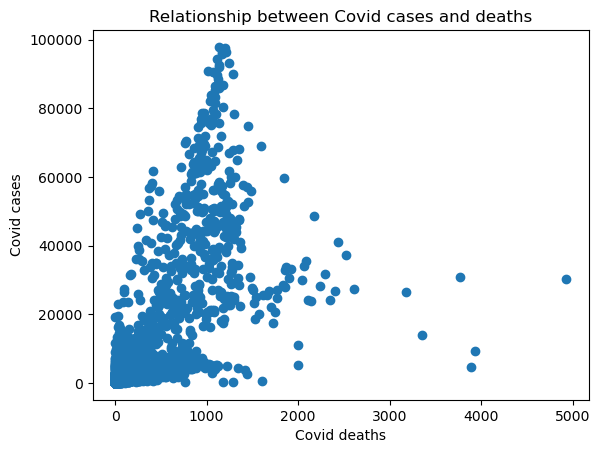

In [21]:
# Note: 25 observations with negative cases or deaths are excluded
covid_filter = covid[(covid['cases'] >= 0) & (covid['deaths'] >= 0)]

plt.scatter(covid_filter['deaths'], covid_filter['cases'])
plt.xlabel('Covid deaths')
plt.ylabel('Covid cases')
plt.title('Relationship between Covid cases and deaths')

#### g. (2 points) Create a line plot using data with `countriesAndTerritories=="China"`, showing date on the x-axis and cases per day on the y-axis. Set an appropriate plot title and axis titles.

Text(0.5, 1.0, 'Daily Covid cases of China in 2020')

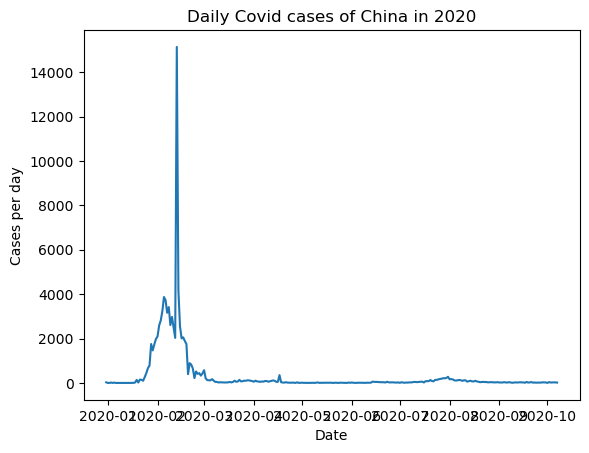

In [22]:
china = covid_filter[covid_filter['countriesAndTerritories'] == 'China']

plt.plot(china['date'], china['cases'])
plt.xlabel('Date')
plt.ylabel('Cases per day')
plt.title('Daily Covid cases of China in 2020')

#### h. (2 points) Similar to above, create a line plot using the data of six countries including "China", "United_States_of_America", "United_Kingdom", "France", "Germany", and "Italy". Use different line colors for each country. Set an appropriate plot title and axis titles.

In [23]:
six_countries = covid_filter[
    covid_filter['countriesAndTerritories'].isin(
        ['China', 'United_States_of_America', 'United_Kingdom',
         'France', 'Germany', 'Italy'])]
six_countries.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,date
9310,07/10/2020,7,10,2020,15,0,China,CN,CHN,1.433784e+09,Asia,0.018692,2020-10-07
9311,06/10/2020,6,10,2020,23,0,China,CN,CHN,1.433784e+09,Asia,0.018901,2020-10-06
9312,05/10/2020,5,10,2020,25,0,China,CN,CHN,1.433784e+09,Asia,0.018134,2020-10-05
9313,04/10/2020,4,10,2020,20,0,China,CN,CHN,1.433784e+09,Asia,0.018901,2020-10-04
9314,03/10/2020,3,10,2020,17,0,China,CN,CHN,1.433784e+09,Asia,0.019250,2020-10-03


In [24]:
six_countries = six_countries.pivot(index='date', columns='countriesAndTerritories', values='cases')
six_countries.head()

countriesAndTerritories,China,France,Germany,Italy,United_Kingdom,United_States_of_America
date,,,,,,
2019-12-31,27.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,17.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Daily Covid cases of major countries in 2020')

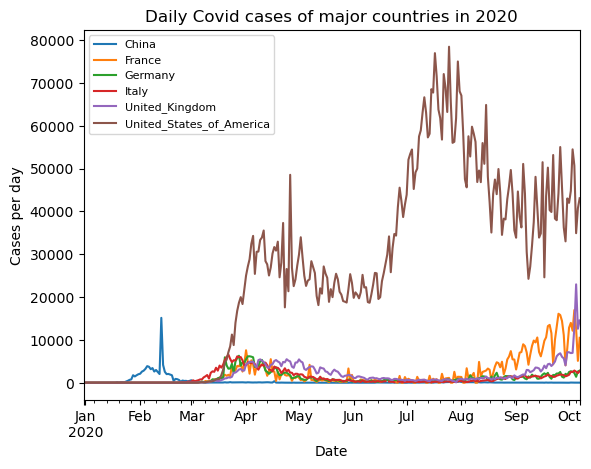

In [25]:
six_countries.plot()
plt.legend(prop={'size': 8})
plt.xlabel('Date')
plt.ylabel('Cases per day')
plt.title('Daily Covid cases of major countries in 2020')

Text(0.5, 1.0, 'Daily Covid cases of major countries in 2020')

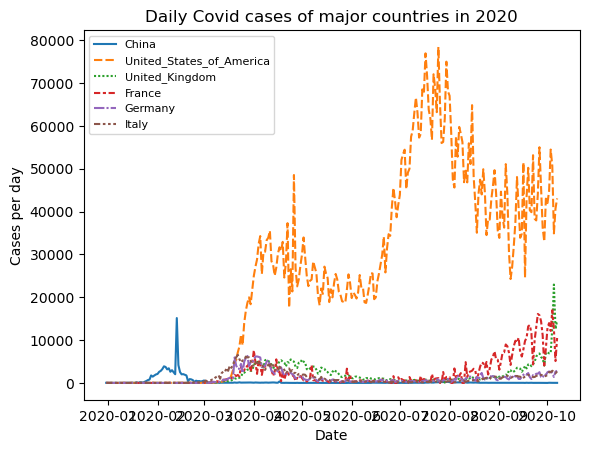

In [26]:
# Seaborn method
# https://www.statology.org/seaborn-plot-multiple-lines/
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
sns.lineplot(data=six_countries[
    ['China', 'United_States_of_America', 'United_Kingdom',
     'France', 'Germany', 'Italy']])
plt.legend(prop={'size': 8})
plt.xlabel('Date')
plt.ylabel('Cases per day')
plt.title('Daily Covid cases of major countries in 2020')

#### i. (2 points) Similar to question h, create a boxplot instead.

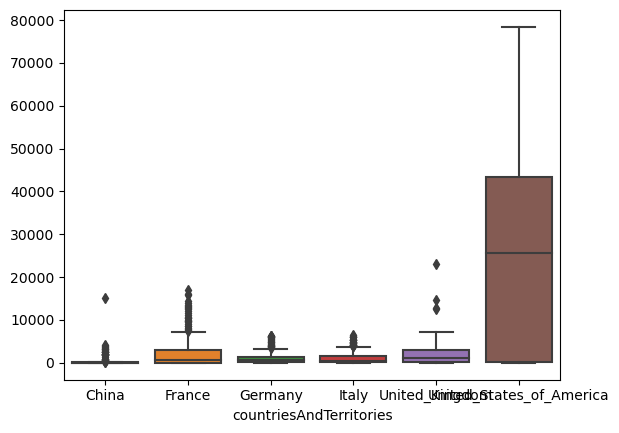

In [27]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data=six_countries)
plt.show()